# Analyzing PCOS symptoms 

### In this analysis I would like to find the most common symptoms of the disease

In [32]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [33]:
#load dataset
df = pd.read_csv('pcos.csv')
df.head(10)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,#NAME?,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,#NAME?,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,#NAME?,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,#NAME?,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN
5,6,6,0,36,74.1,165.0,#NAME?,15,78,28,...,0.0,0,110,70,9,6,16.0,20.0,8.0,NaN
6,7,7,0,34,64.0,156.0,#NAME?,11,72,18,...,0.0,0,120,80,6,6,15.0,16.0,6.8,NaN
7,8,8,0,33,58.5,159.0,#NAME?,13,72,20,...,0.0,0,120,80,7,6,15.0,18.0,7.1,NaN
8,9,9,0,32,40.0,158.0,#NAME?,11,72,18,...,0.0,0,120,80,5,7,17.0,17.0,4.2,NaN
9,10,10,0,36,52.0,150.0,#NAME?,15,80,20,...,0.0,0,110,80,1,1,14.0,17.0,2.5,NaN


In [34]:
#make a copy of data 
df_copy = df.copy()

## Cleaning:

In [35]:
#looking at all columns
for col in df.columns:
    print(col)

Sl. No
Patient File No.
PCOS (Y/N)
 Age (yrs)
Weight (Kg)
Height(Cm) 
BMI
Blood Group
Pulse rate(bpm) 
RR (breaths/min)
Hb(g/dl)
Cycle(R/I)
Cycle length(days)
Marraige Status (Yrs)
Pregnant(Y/N)
No. of aborptions
  I   beta-HCG(mIU/mL)
II    beta-HCG(mIU/mL)
FSH(mIU/mL)
LH(mIU/mL)
FSH/LH
Hip(inch)
Waist(inch)
Waist:Hip Ratio
TSH (mIU/L)
AMH(ng/mL)
PRL(ng/mL)
Vit D3 (ng/mL)
PRG(ng/mL)
RBS(mg/dl)
Weight gain(Y/N)
hair growth(Y/N)
Skin darkening (Y/N)
Hair loss(Y/N)
Pimples(Y/N)
Fast food (Y/N)
Reg.Exercise(Y/N)
BP _Systolic (mmHg)
BP _Diastolic (mmHg)
Follicle No. (L)
Follicle No. (R)
Avg. F size (L) (mm)
Avg. F size (R) (mm)
Endometrium (mm)
Unnamed: 44


I will be dropping the following columns for a more concise analysis:
* Marriage status
* S1. No


In [36]:
df = df.drop(['Marraige Status (Yrs)', 'Sl. No'], axis=1)
df

,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,0,28,44.6,152.000,19.3,15,78,22,10.48,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,0,36,65.0,161.500,#NAME?,15,74,20,11.70,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,1,33,68.8,165.000,#NAME?,11,72,18,11.80,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,0,37,65.0,148.000,#NAME?,13,72,20,12.00,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,0,25,52.0,161.000,#NAME?,11,72,18,10.00,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,0,35,50.0,164.592,18.5,17,72,16,11.00,...,0.0,0,110,70,1,0,17.5,10.0,6.7,NaN
537,538,0,30,63.2,158.000,25.3,15,72,18,10.80,...,0.0,0,110,70,9,7,19.0,18.0,8.2,NaN
538,539,0,36,54.0,152.000,23.4,13,74,20,10.80,...,0.0,0,110,80,1,0,18.0,9.0,7.3,NaN
539,540,0,27,50.0,150.000,22.2,15,74,20,12.00,...,0.0,0,110,70,7,6,18.0,16.0,11.5,NaN


In [37]:
#converting the heights from cm -> m
df['Height(Cm) '] = df['Height(Cm) ']/100
df

,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,0,28,44.6,1.52000,19.3,15,78,22,10.48,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,0,36,65.0,1.61500,#NAME?,15,74,20,11.70,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,1,33,68.8,1.65000,#NAME?,11,72,18,11.80,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,0,37,65.0,1.48000,#NAME?,13,72,20,12.00,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,0,25,52.0,1.61000,#NAME?,11,72,18,10.00,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,0,35,50.0,1.64592,18.5,17,72,16,11.00,...,0.0,0,110,70,1,0,17.5,10.0,6.7,NaN
537,538,0,30,63.2,1.58000,25.3,15,72,18,10.80,...,0.0,0,110,70,9,7,19.0,18.0,8.2,NaN
538,539,0,36,54.0,1.52000,23.4,13,74,20,10.80,...,0.0,0,110,80,1,0,18.0,9.0,7.3,NaN
539,540,0,27,50.0,1.50000,22.2,15,74,20,12.00,...,0.0,0,110,70,7,6,18.0,16.0,11.5,NaN


In [38]:
#calculating BMI
df['BMI'] = df['Weight (Kg)']/(df['Height(Cm) '])**2
df

,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,0,28,44.6,1.52000,19.304017,15,78,22,10.48,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,0,36,65.0,1.61500,24.921163,15,74,20,11.70,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,1,33,68.8,1.65000,25.270891,11,72,18,11.80,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,0,37,65.0,1.48000,29.674945,13,72,20,12.00,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,0,25,52.0,1.61000,20.060954,11,72,18,10.00,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,0,35,50.0,1.64592,18.456637,17,72,16,11.00,...,0.0,0,110,70,1,0,17.5,10.0,6.7,NaN
537,538,0,30,63.2,1.58000,25.316456,15,72,18,10.80,...,0.0,0,110,70,9,7,19.0,18.0,8.2,NaN
538,539,0,36,54.0,1.52000,23.372576,13,74,20,10.80,...,0.0,0,110,80,1,0,18.0,9.0,7.3,NaN
539,540,0,27,50.0,1.50000,22.222222,15,74,20,12.00,...,0.0,0,110,70,7,6,18.0,16.0,11.5,NaN


In [39]:
#rename columns 
df = df.rename(columns={'Patient File No.': 'Patient_No', 'PCOS (Y/N)':'PCOS',	' Age (yrs)':'Age',	'Weight (Kg)':'Weight',	'Height(Cm)':'Height',	'Blood Group':'Blood_group', 'Pulse rate(bpm) ': 'Pulse', 'RR (breaths/min)':'Respirations', 'Hb(g/dl)':'HBGN', 'Cycle(R/I)':'Cycle', 'Cycle length(days)':'Cycle_length',	'Pregnant(Y/N)':'Pregnant','No. of aborptions':'No_abortions',	'  I   beta-HCG(mIU/mL)': 'Case_I_beta-HCG', 'II    beta-HCG(mIU/mL)':'Case_II_beta-HCG', 'FSH(mIU/mL)':'FSH', 'LH(mIU/mL)':'LH',	'Hip(inch)':'Hip','Waist(inch)':'Waist', 'Waist:Hip Ratio':'Waist/Hip', 'TSH (mIU/L)': 'TSH','AMH(ng/mL)':'AMH',	'PRL(ng/mL)': 'PRL', 'Vit D3 (ng/mL)': 'Vit_D3', 'PRG(ng/mL)': 'PRG', 'RBS(mg/dl)': 'RBS','Weight gain(Y/N)':'Weight_gain', 'hair growth(Y/N)': 'Hair_growth', 'Skin darkening (Y/N)': 'Skin_darkening', 'Hair loss(Y/N)': 'Hair_loss', 'Pimples(Y/N)': 'Pimples', 'Fast food (Y/N)': 'Fast_food','Reg.Exercise(Y/N)': 'Regular_exercise', 'BP _Systolic (mmHg)': 'BP_D', 'BP _Diastolic (mmHg)': 'BP_S',	'Follicle No. (L)': '#_left_follicle',	'Follicle No. (R)':'#_right_follicle', 'Avg. F size (L) (mm)':'Avg_left_fol_size', 'Avg. F size (R) (mm)':'Avg_right_fol_size', 'Endometrium (mm)':'Endometrium'})
df

,Patient_No,PCOS,Age,Weight,Height(Cm),BMI,Blood_group,Pulse,Respirations,HBGN,...,Fast_food,Regular_exercise,BP_D,BP_S,#_left_follicle,#_right_follicle,Avg_left_fol_size,Avg_right_fol_size,Endometrium,Unnamed: 44
0,1,0,28,44.6,1.52000,19.304017,15,78,22,10.48,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,0,36,65.0,1.61500,24.921163,15,74,20,11.70,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,1,33,68.8,1.65000,25.270891,11,72,18,11.80,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,0,37,65.0,1.48000,29.674945,13,72,20,12.00,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,0,25,52.0,1.61000,20.060954,11,72,18,10.00,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,0,35,50.0,1.64592,18.456637,17,72,16,11.00,...,0.0,0,110,70,1,0,17.5,10.0,6.7,NaN
537,538,0,30,63.2,1.58000,25.316456,15,72,18,10.80,...,0.0,0,110,70,9,7,19.0,18.0,8.2,NaN
538,539,0,36,54.0,1.52000,23.372576,13,74,20,10.80,...,0.0,0,110,80,1,0,18.0,9.0,7.3,NaN
539,540,0,27,50.0,1.50000,22.222222,15,74,20,12.00,...,0.0,0,110,70,7,6,18.0,16.0,11.5,NaN


In [40]:
#drop last column "Unnamed"
df = df.drop('Unnamed: 44', axis=1)
df

,Patient_No,PCOS,Age,Weight,Height(Cm),BMI,Blood_group,Pulse,Respirations,HBGN,...,Pimples,Fast_food,Regular_exercise,BP_D,BP_S,#_left_follicle,#_right_follicle,Avg_left_fol_size,Avg_right_fol_size,Endometrium
0,1,0,28,44.6,1.52000,19.304017,15,78,22,10.48,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,0,36,65.0,1.61500,24.921163,15,74,20,11.70,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,1,33,68.8,1.65000,25.270891,11,72,18,11.80,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,0,37,65.0,1.48000,29.674945,13,72,20,12.00,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,0,25,52.0,1.61000,20.060954,11,72,18,10.00,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,0,35,50.0,1.64592,18.456637,17,72,16,11.00,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,538,0,30,63.2,1.58000,25.316456,15,72,18,10.80,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,539,0,36,54.0,1.52000,23.372576,13,74,20,10.80,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,540,0,27,50.0,1.50000,22.222222,15,74,20,12.00,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


In [41]:
#calculate waist:hip ratio
df['Waist/Hip'] = df['Waist']/df['Hip']
df['Waist/Hip']

0      0.833333
1      0.842105
2      0.900000
3      0.857143
4      0.810811
         ...   
536    0.928571
537    0.941176
538    0.933333
539    0.928571
540    0.958333
Name: Waist/Hip, Length: 541, dtype: float64

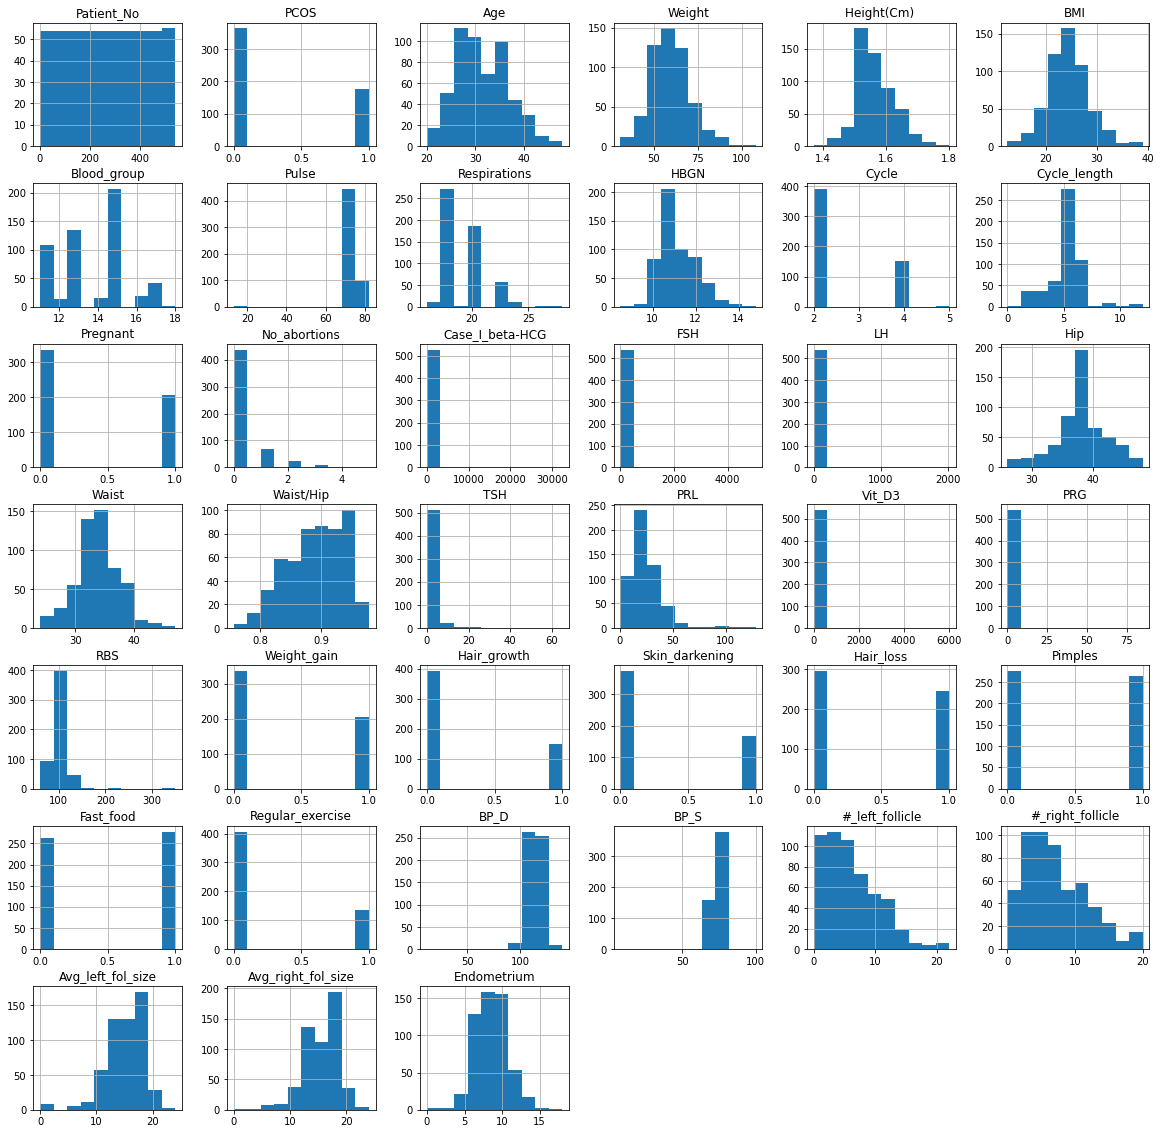

In [42]:
#plotting the parameters
df.hist(figsize=[20, 20]);

In [43]:
#writing cleaned df to file
df.to_csv('pcos_clean.csv', index=False)

In [44]:
#creating sub-group of features I would like to explore
df_group = df[['PCOS','Weight', 'FSH', 'LH', 'TSH', 'PRG', 'Vit_D3', 'PRL', 'RBS', '#_left_follicle', '#_right_follicle', 'Avg_left_fol_size', 'Avg_right_fol_size','Endometrium', 'Weight_gain', 'Hair_growth', 'Hair_loss', 'Skin_darkening', 'Pimples', 'Fast_food', 'Regular_exercise']]
df_group = df_group.dropna()
df_group

,PCOS,Weight,FSH,LH,TSH,PRG,Vit_D3,PRL,RBS,#_left_follicle,...,Avg_left_fol_size,Avg_right_fol_size,Endometrium,Weight_gain,Hair_growth,Hair_loss,Skin_darkening,Pimples,Fast_food,Regular_exercise
0,0,44.6,7.95,3.68,0.68,0.57,17.1,45.16,92.0,3,...,18.0,18.0,8.5,0,0,0,0,0,1.0,0
1,0,65.0,6.73,1.09,3.16,0.97,61.3,20.09,92.0,3,...,15.0,14.0,3.7,0,0,0,0,0,0.0,0
2,1,68.8,5.54,0.88,2.54,0.36,49.7,10.52,84.0,13,...,18.0,20.0,10.0,0,0,1,0,1,1.0,0
3,0,65.0,8.06,2.36,16.41,0.36,33.4,36.90,76.0,2,...,15.0,14.0,7.5,0,0,0,0,0,0.0,0
4,0,52.0,3.98,0.90,3.57,0.38,43.8,30.09,84.0,3,...,16.0,14.0,7.0,0,0,1,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0,50.0,10.06,1.81,1.11,0.25,36.6,5.30,92.0,1,...,17.5,10.0,6.7,0,0,0,0,0,0.0,0
537,0,63.2,5.07,2.84,2.05,0.25,23.0,21.09,108.0,9,...,19.0,18.0,8.2,1,0,0,0,0,0.0,0
538,0,54.0,11.96,2.78,2.87,0.25,22.5,96.41,92.0,1,...,18.0,9.0,7.3,0,0,0,0,0,0.0,0
539,0,50.0,4.40,4.33,2.50,0.25,22.4,38.89,115.0,7,...,18.0,16.0,11.5,0,0,0,0,1,0.0,0


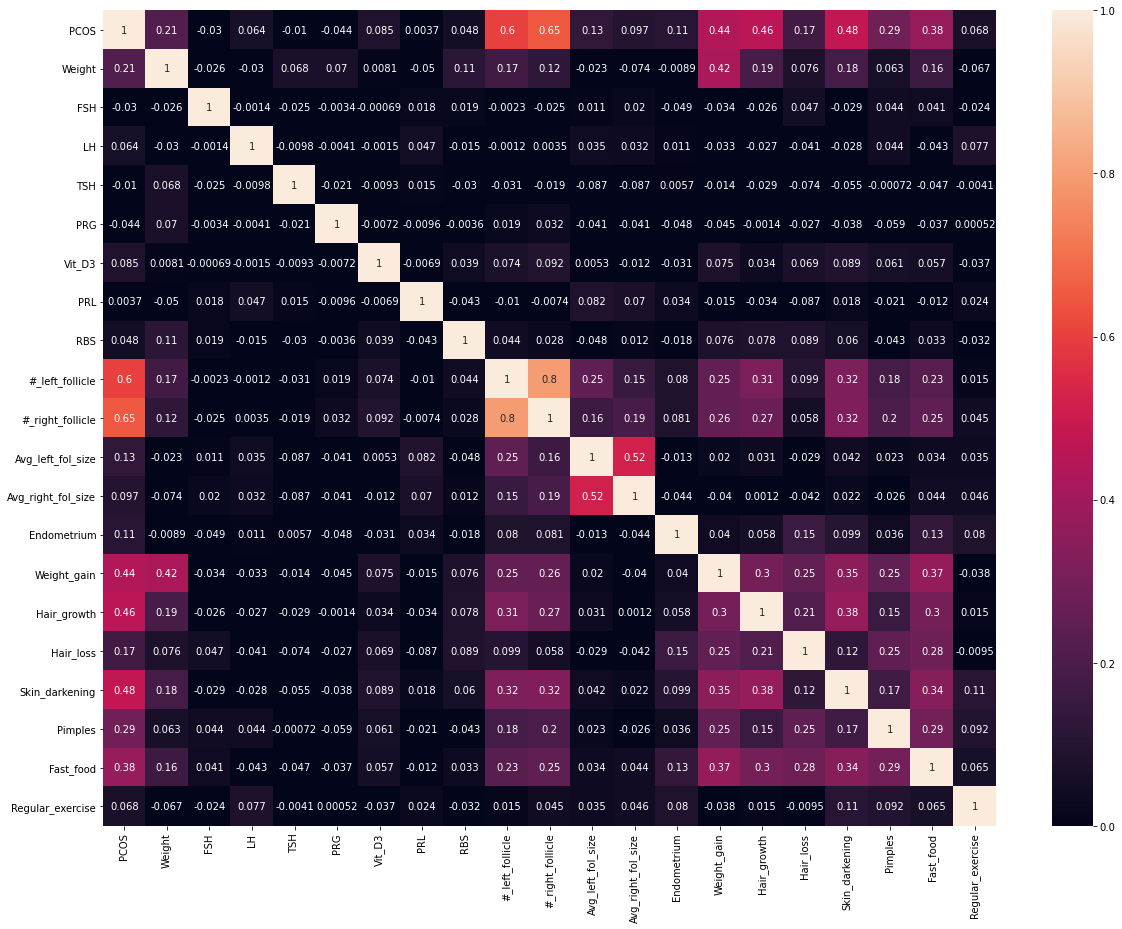

In [45]:
#plotting a heatmap
plt.figure(figsize=[20,15]) 
corr = df_group.corr()
sb.heatmap(corr, vmin=0, vmax=1, annot=True);

* Based on the heatmap, the features that have the highest correlation with PCOS are the number of follicles (left - 0.60 and right - 0.65), skin darkening (0.48), hair growth (0.46), weight gain (0.44) and fast food (0.38). These relationships would be considered moderate since they fall wthin the range of 0.30 - 0.70.

* Weight, pimples, hair loss, average left follicle size and endometrium also have positive correlations with PCOS however, they are weak since their correlation coefficients are 0.21, 0.29, 0.17, 0.13, 0.11, respectively. These are clssified as weak because they fall within the range of 0.00 - 0.30.

* The negatively correlated features are PRG with a coefficient of -0.044 and TSH with a coefficient of -0.01. Both of these correlations with PCOS are weak.



## Regression Analysis:
* I will be focusing on the features that show the highest correlation with PCOS

In [46]:
#add an intercept column
df_group['intercept'] = 1
df_group

,PCOS,Weight,FSH,LH,TSH,PRG,Vit_D3,PRL,RBS,#_left_follicle,...,Avg_right_fol_size,Endometrium,Weight_gain,Hair_growth,Hair_loss,Skin_darkening,Pimples,Fast_food,Regular_exercise,intercept
0,0,44.6,7.95,3.68,0.68,0.57,17.1,45.16,92.0,3,...,18.0,8.5,0,0,0,0,0,1.0,0,1
1,0,65.0,6.73,1.09,3.16,0.97,61.3,20.09,92.0,3,...,14.0,3.7,0,0,0,0,0,0.0,0,1
2,1,68.8,5.54,0.88,2.54,0.36,49.7,10.52,84.0,13,...,20.0,10.0,0,0,1,0,1,1.0,0,1
3,0,65.0,8.06,2.36,16.41,0.36,33.4,36.90,76.0,2,...,14.0,7.5,0,0,0,0,0,0.0,0,1
4,0,52.0,3.98,0.90,3.57,0.38,43.8,30.09,84.0,3,...,14.0,7.0,0,0,1,0,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0,50.0,10.06,1.81,1.11,0.25,36.6,5.30,92.0,1,...,10.0,6.7,0,0,0,0,0,0.0,0,1
537,0,63.2,5.07,2.84,2.05,0.25,23.0,21.09,108.0,9,...,18.0,8.2,1,0,0,0,0,0.0,0,1
538,0,54.0,11.96,2.78,2.87,0.25,22.5,96.41,92.0,1,...,9.0,7.3,0,0,0,0,0,0.0,0,1
539,0,50.0,4.40,4.33,2.50,0.25,22.4,38.89,115.0,7,...,16.0,11.5,0,0,0,0,1,0.0,0,1


In [47]:
#logistic regression model 
import statsmodels.api as sm  
log_model = sm.Logit(df_group['PCOS'], df_group[['intercept', '#_right_follicle', '#_left_follicle', 'Weight_gain', 'Hair_growth', 'Skin_darkening', 'Fast_food']])
results = log_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.249477
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   PCOS   No. Observations:                  540
Model:                          Logit   Df Residuals:                      533
Method:                           MLE   Df Model:                            6
Date:                Mon, 19 Apr 2021   Pseudo R-squ.:                  0.6056
Time:                        21:08:55   Log-Likelihood:                -134.72
converged:                       True   LL-Null:                       -341.60
Covariance Type:            nonrobust   LLR p-value:                 3.065e-86
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept           -6.8722      0.603    -11.399      0.000      -8.054      -5.691
#_right_follicle     0.3844      0.059      6.510      0.000       0.269       0.500
#_left_follicle      0.1769      0.060      2.966      0.003       0.060       0.294
Weight_gain          1.5604      0.336      4.639      0.000       0.901       2.220
Hair_growth          1.6466      0.357      4.611      0.000       0.947       2.347
Skin_darkening       1.2746      0.336      3.789      0.000       0.615       1.934
Fast_food            0.7234      0.340      2.125      0.034       0.056       1.391
====================================================================================
"""

In [48]:
#exponentiate coeffs
np.exp(-6.8722), np.exp(0.3844), np.exp(0.1769), np.exp(1.5604), np.exp(1.6466), np.exp(1.2746), np.exp(0.7234)

(0.001036194926345733,
 1.4687328173259593,
 1.1935117359857828,
 4.760725154392374,
 5.189306158030623,
 3.5772702157954823,
 2.061430171653389)

By exponentiating the coeffiecients, it is shown that having hair growth increases the odds of a patient having PCOS by 5 times. The odds of having PCOS after gaining weight increases by 4.8, experiencing skin darkening by 3.6, and consuming fast food by 2.1. 

## Machine Learning Model:

In [49]:
#import scikit libraries for logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix

In [50]:
#train models
y = df_group['PCOS']
x =  df_group[['#_right_follicle', '#_left_follicle', 'Weight_gain', 'Hair_growth', 'Skin_darkening', 'Fast_food']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42) 

In [51]:
#check model fitness
log_mod = LogisticRegression()
log_mod.fit(x_train, y_train)
y_preds = log_mod.predict(x_test)
print(precision_score(y_test, y_preds))
print(recall_score(y_test, y_preds))
print(accuracy_score(y_test, y_preds))
confusion_matrix(y_test, y_preds)

0.8275862068965517
0.75
0.8796296296296297


array([[71,  5],
       [ 8, 24]], dtype=int64)

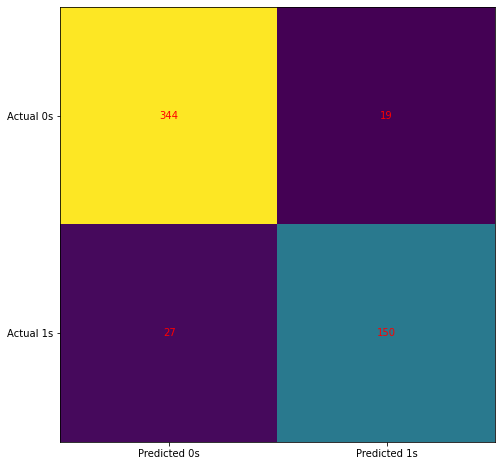

In [52]:
#visualizing confusion matrix 
cm = confusion_matrix(y, log_mod.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

#### The model has a precision of 83%, a recall of 75% and an accuracy of 88%. All in all, I would say the model is a good fit.

## Baye's Theory:

In [53]:
#prob of having PCOS
df.PCOS.mean()

0.32717190388170053

In [55]:
#prob of skin darkening
df.Skin_darkening.mean()

0.3068391866913124

In [57]:
pcos = df.query('PCOS == 1')
pcos

,Patient_No,PCOS,Age,Weight,Height(Cm),BMI,Blood_group,Pulse,Respirations,HBGN,...,Pimples,Fast_food,Regular_exercise,BP_D,BP_S,#_left_follicle,#_right_follicle,Avg_left_fol_size,Avg_right_fol_size,Endometrium
2,3,1,33,68.8,1.65000,25.270891,11,72,18,11.8,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
12,13,1,25,74.0,1.52000,32.029086,17,72,18,11.7,...,1,1.0,1,120,80,15,8,20.0,21.0,8.0
19,20,1,30,85.0,1.65000,31.221304,16,72,18,12.5,...,1,1.0,0,120,80,16,8,18.0,17.0,11.0
24,25,1,34,63.0,1.58000,25.236340,11,72,20,11.2,...,1,1.0,0,120,70,4,6,18.0,17.0,7.3
26,27,1,30,76.0,1.60000,29.687500,15,75,18,11.2,...,1,1.0,1,120,80,21,20,11.0,12.0,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,521,1,27,50.0,1.68000,17.715420,13,72,18,12.0,...,1,0.0,0,120,70,18,20,20.0,19.0,7.8
523,524,1,36,60.0,1.50000,26.666667,15,72,18,10.2,...,1,0.0,0,110,80,6,9,17.0,22.0,7.6
524,525,1,27,70.0,1.70688,24.026586,13,72,18,11.5,...,0,0.0,0,120,80,9,10,21.0,23.0,6.5
533,534,1,26,53.5,1.61544,20.500862,14,70,18,10.6,...,1,0.0,0,110,80,8,10,18.0,18.0,10.3


In [58]:
#avg no. with skin darkening (SD)
pcos.Skin_darkening.mean()

0.6214689265536724

## Applying Bayes Theory
### Prior:
pcos = 0.327 
Nopcos = (1 - 0.327) = 0.673
SD-pcos = 0.621 
NoSD-pcos = (1 - 0.621) = 0.379
SD-Nopcos = (1 - 0.846) = 0.154
NoSD-Nopcos = 0.846

### Posterior:
Prob of having skin darkening and PCOS
P(PCOS|SD) = 0.327 * 0.621 = 0.203

Prob of having skin darkening without PCOS P(NoPCOS|SD)= 0.673 * 0.154 = 0.104

### Normalizer:
Prob of skin darkening = P(PCOS|SD) + P(NoPCOS|SD) = 0.203 + 0.104 = 0.307

Therefore, the probability of having skin darkening and having PCOS is P(PCOS|SD)/Normalizer = 0.203/0.307 = 0.661

The probability of having skin darkening and not having PCOS is P(NoPCOS|SD)/Normalizer = 0.104/0.307 = 0.339